In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
X_train[0].shape

(28, 28)

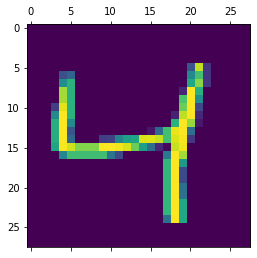

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [14]:
print(X_train_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
X_train_flattened.shape

(60000, 784)

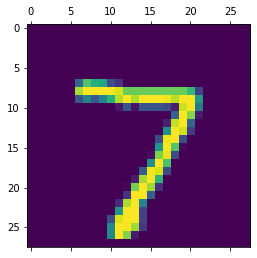

In [16]:
plt.matshow(X_test[0])

In [17]:
print(y_test[0])

7


In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [20]:
X_test_flattened.shape

(10000, 784)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4689 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2831 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2665 - accuracy: 0.9256


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9257


[0.2691488564014435, 0.9257000088691711]

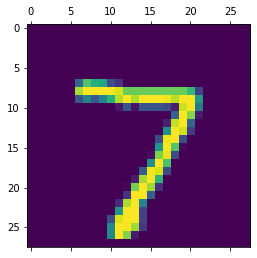

In [23]:
plt.matshow(X_test[0])

In [24]:
y_pred = model.predict(X_test_flattened)

In [25]:
print(y_pred)

[[2.9874235e-02 4.4435066e-07 9.4971627e-02 ... 9.9978125e-01
  1.0454595e-01 7.0795554e-01]
 [5.8357966e-01 6.5918267e-03 9.9973750e-01 ... 1.7100286e-12
  1.6416559e-01 3.4663701e-09]
 [4.5865774e-04 9.9191499e-01 6.8255335e-01 ... 1.6750732e-01
  3.5528111e-01 5.0702184e-02]
 ...
 [4.4075168e-06 4.6730847e-06 2.2637546e-03 ... 2.0964387e-01
  5.0574774e-01 8.5935521e-01]
 [1.4126301e-04 1.7136335e-04 2.9033422e-04 ... 5.1334348e-05
  6.6936451e-01 2.4083257e-04]
 [1.7094553e-02 4.4779153e-10 4.2906040e-01 ... 1.6586565e-08
  3.3310056e-04 1.2662587e-06]]


In [26]:
y_pred[0]

array([2.9874235e-02, 4.4435066e-07, 9.4971627e-02, 9.5067513e-01,
       1.7399192e-03, 1.2183237e-01, 2.6592886e-06, 9.9978125e-01,
       1.0454595e-01, 7.0795554e-01], dtype=float32)

In [27]:
np.argmax(y_pred[0])

7

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [30]:
conf = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [31]:
print(conf[0])

tf.Tensor([960   0   2   2   0   5   8   2   1   0], shape=(10,), dtype=int32)


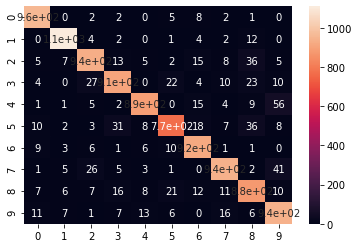

In [32]:
import seaborn as sns
sns.heatmap(conf,annot=True)

In [33]:
models = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

models.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
models.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2778 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1304 - accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0903 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

In [34]:
y_pred = models.predict(X_test_flattened)
print(y_pred)

[[1.8126369e-03 1.9114696e-05 1.3017079e-01 ... 1.0000000e+00
  6.0903728e-03 2.9051393e-02]
 [1.3192429e-05 9.3941605e-01 1.0000000e+00 ... 7.6649883e-15
  1.3947308e-02 1.6079494e-07]
 [4.2629483e-05 9.9984115e-01 1.5326309e-01 ... 7.6517069e-01
  1.4084050e-01 3.5208464e-04]
 ...
 [3.9669917e-11 1.2001302e-06 1.5793582e-10 ... 7.7447009e-01
  2.0409289e-01 6.2213373e-01]
 [3.0840274e-05 2.6753841e-07 3.3002544e-07 ... 2.8679937e-02
  9.9291974e-01 1.7914208e-07]
 [9.2698336e-03 2.6935752e-06 3.6822259e-03 ... 2.4795355e-08
  1.2844801e-04 7.6415445e-06]]


In [35]:
np.argmax(y_pred[0])

7

In [36]:
y_predicted = [np.argmax(i) for i in y_pred]

In [37]:
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [38]:
models.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9768


[0.08178246021270752, 0.9768000245094299]

In [39]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted)
print(cm[0])

tf.Tensor([969   1   1   1   2   0   3   1   2   0], shape=(10,), dtype=int32)


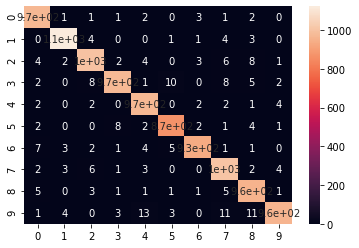

In [40]:
sns.heatmap(cm,annot=True)